In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [3]:
d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
matplotlib.rcParams['font.family']='D2Coding'

In [4]:
file_path='./ref/온라인쇼핑몰_판매매체별_상품군별거래액_20250227153229.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.columns = ['category','date','internet','mobile']
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [5]:
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))

In [6]:
ori['date'] = pd.to_datetime(ori['date'], format='%Y.%m')
ori['date']

0      2017-01-01
1      2017-02-01
2      2017-03-01
3      2017-04-01
4      2017-05-01
          ...    
2203   2024-08-01
2204   2024-09-01
2205   2024-10-01
2206   2024-11-01
2207   2024-12-01
Name: date, Length: 2208, dtype: datetime64[ns]

In [26]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] == '컴퓨터 및 주변기기']
# ex1_data = ex1_data[ex1_data['category'].isin(['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스'])]
# obj = ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
obj = ['의복','신발']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)
print(ex1_data.sample(5))

    category       date  internet   mobile
545       신발 2022-06-01     96552   241975
440       의복 2021-09-01    332776  1032435
510       신발 2019-07-01     77272   127793
555       신발 2023-04-01    114715   227138
473       의복 2024-06-01    451747  1323126


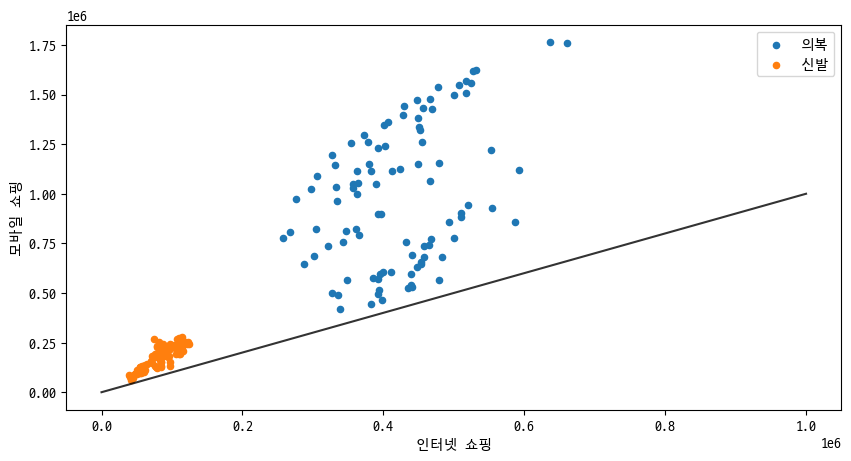

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

# category_data = ex1_data[ex1_data['category'] == obj[0]]
# category_data = ex1_data[ex1_data['category'] == obj[1]]
# category_data = ex1_data[ori['date']]

category = obj
for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s=20, label=cate)


# x_data = category_data['internet']
# y_data = category_data['mobile']

# x_data = ori['date']

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')

# s=20은 산점도의 점 크기를 설정하고, label은 범례에 해당 카테고리의 이름을 추가
# ax.scatter(x_data, y_data, s=20, label=obj[0])
# ax.scatter(x_data, y_data, s=20, label=obj[1])

# 범례
ax.legend(loc='best')

# (0, 0)부터 (1000000, 1000000)까지 대각선 직선을 그림. 'k-'는 검은색 실선, alpha=0.8은 투명도를 설정
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.8)
plt.show()
# print(category_data,x_data,y_data)

## 의복의 매체별 이용현황

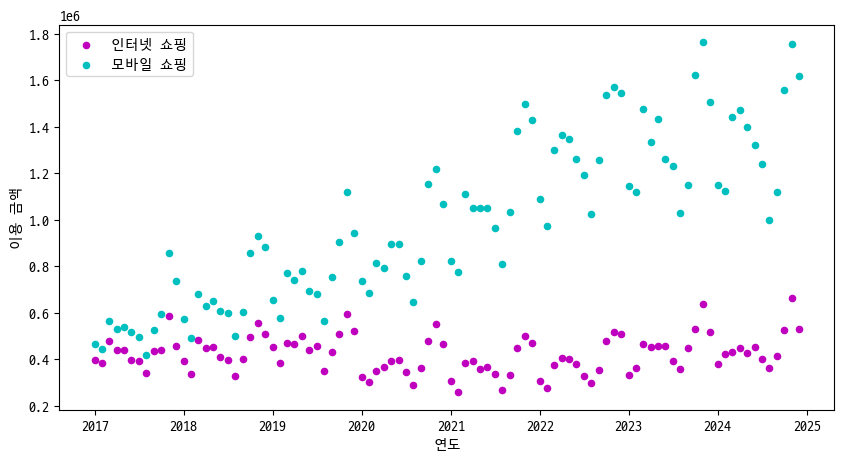

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

category_data = ex1_data[ex1_data['category'] == obj[0]]

# category = obj
# for cate in obj:
#     category_data = ex1_data[ex1_data['category'] == cate]
#     x_data = category_data['internet']
#     y_data = category_data['mobile']
#     ax.scatter(x_data, y_data, s=20, label=cate)



x_data = category_data['date']
y_data_internet = category_data['internet']
y_data_mobile = category_data['mobile']

ax.set_xlabel('연도')
ax.set_ylabel('이용 금액')

ax.scatter(x_data, y_data_internet, label='인터넷 쇼핑', color='m', s=20)
ax.scatter(x_data, y_data_mobile, label='모바일 쇼핑', color='c', s=20)

# 범례 추가
ax.legend(loc='best')

ax.plot(alpha=0.8)

plt.show()



In [43]:
## 테스트

480     61269
481     73655
482     97495
483     97379
484    104765
        ...  
571    179145
572    194905
573    230026
574    276358
575    268212
Name: mobile, Length: 96, dtype: int64
384    397422
385    382105
386    478990
387    441022
388    439084
        ...  
475    362155
476    411669
477    524142
478    661029
479    527686
Name: internet, Length: 96, dtype: int64
480     61269
481     73655
482     97495
483     97379
484    104765
        ...  
571    179145
572    194905
573    230026
574    276358
575    268212
Name: mobile, Length: 96, dtype: int64
480     42529
481     44976
482     55799
483     54249
484     55797
        ...  
571     94094
572     76550
573     78708
574    114736
575     74162
Name: internet, Length: 96, dtype: int64


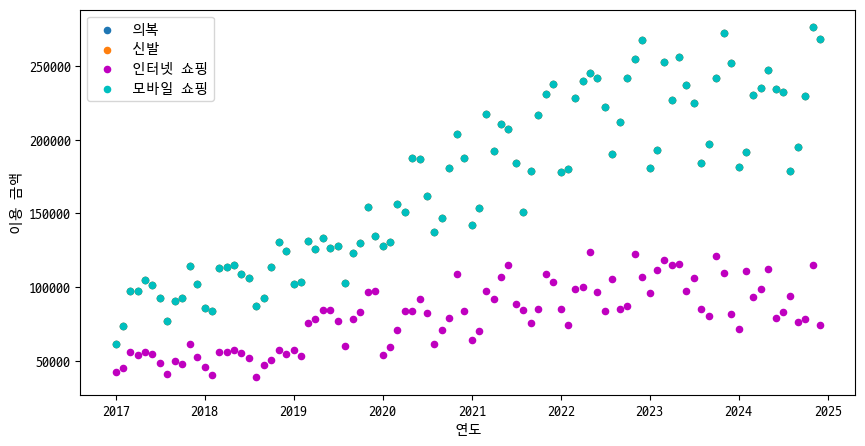

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

# category_data = ex1_data[ex1_data['category'] == obj[0]]

category = obj
for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['date']
    y_data_internet = category_data['internet']
    y_data_mobile = category_data['mobile']
    ax.scatter(x_data, y_data, s=20, label=cate)
    # print(category_data)
    print(y_data)
    print(y_data_internet)



# x_data = category_data['date']
# y_data_internet = category_data['internet']
# y_data_mobile = category_data['mobile']

ax.set_xlabel('연도')
ax.set_ylabel('이용 금액')

ax.scatter(x_data, y_data_internet, label='인터넷 쇼핑', color='m', s=20)
ax.scatter(x_data, y_data_mobile, label='모바일 쇼핑', color='c', s=20)

# 범례 추가
ax.legend(loc='best')

ax.plot(alpha=0.8)

plt.show()



## 의복, 신발의 매체별 이용현황

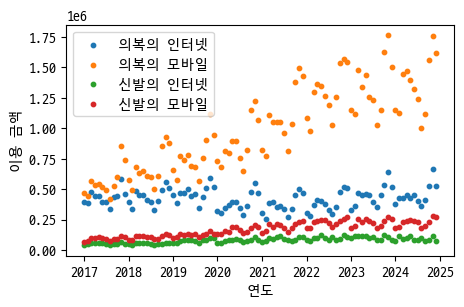

In [50]:
fig, ax = plt.subplots(figsize=(5, 3))

category = obj
for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['date']
    y_data_internet = category_data['internet']
    y_data_mobile = category_data['mobile']
    

    ax.scatter(x_data, y_data_internet, label=f'{cate}의 인터넷', s=10)
    ax.scatter(x_data, y_data_mobile, label=f'{cate}의 모바일', s=10)

# 그래프 설정
ax.set_xlabel('연도')
ax.set_ylabel('이용 금액')
ax.legend(loc='best')

plt.show()

